In [1]:
import tensorflow as tf
import model
import data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, x_test)=data.load_data()
print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)

x_train shape : (60000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)


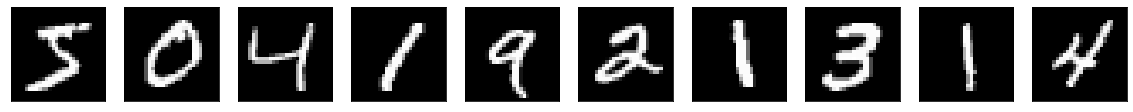

In [3]:

_, axs = plt.subplots(1, 10, figsize=(20,10))
plt.gray()
for i in range(10):
    axs[i].imshow(x_train[i].reshape(28,28))
    
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#noise_factor=1

In [4]:
(_, x_test_noisy_0)=data.add_gaussian_noise(0, x_train, x_test)
(_, x_test_noisy_20)=data.add_gaussian_noise(0.2, x_train, x_test)
(_, x_test_noisy_40)=data.add_gaussian_noise(0.4, x_train, x_test)
(_, x_test_noisy_60)=data.add_gaussian_noise(0.6, x_train, x_test)
(_, x_test_noisy_70)=data.add_gaussian_noise(0.7, x_train, x_test)
(_, x_test_noisy_80)=data.add_gaussian_noise(0.8, x_train, x_test)
(_, x_test_noisy_90)=data.add_gaussian_noise(0.9, x_train, x_test)
(_, x_test_noisy_100)=data.add_gaussian_noise(1, x_train, x_test)

Visualizing testing data!!


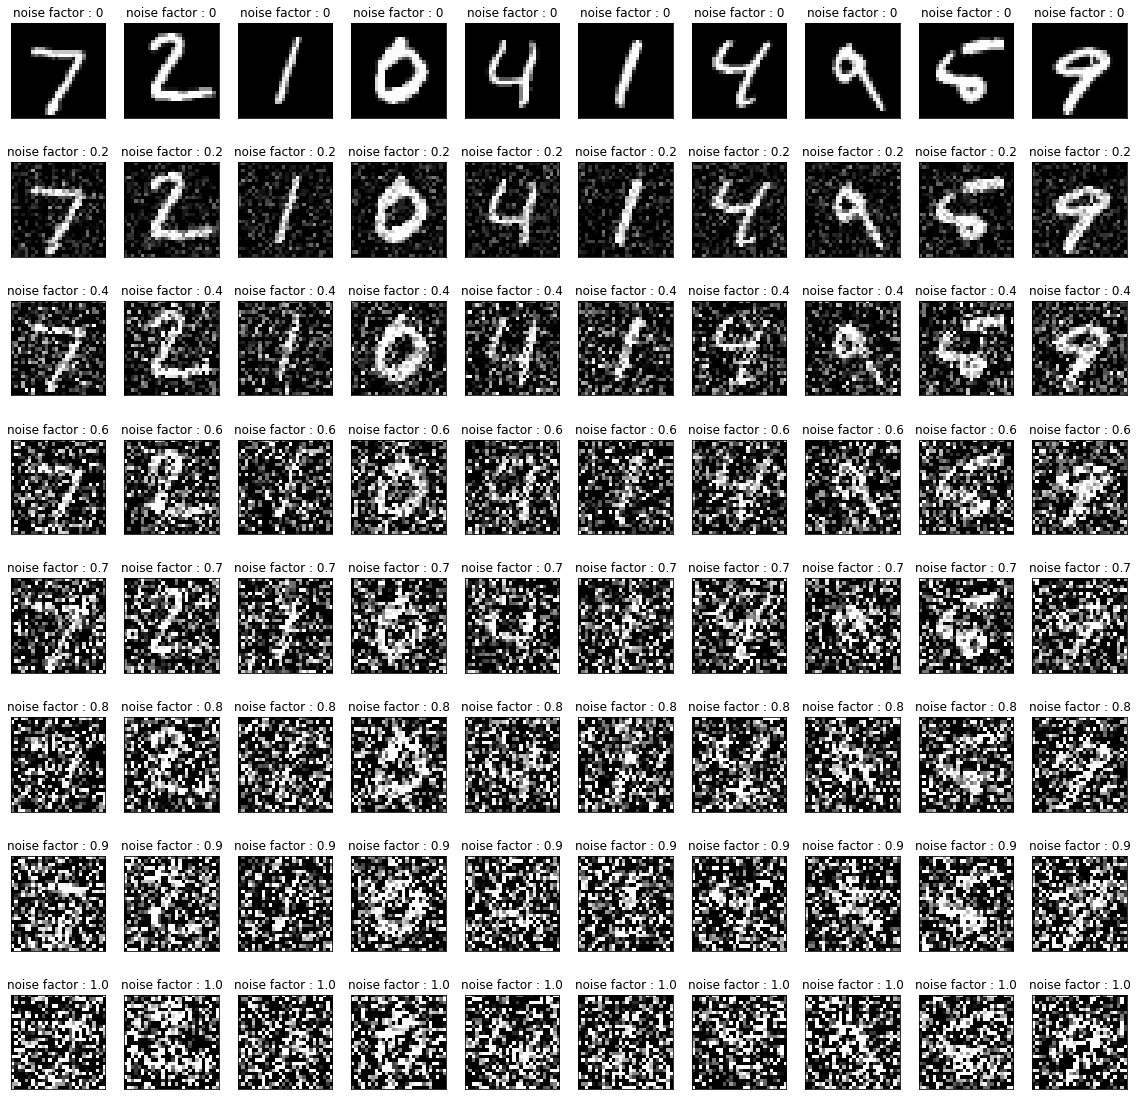

In [9]:
print("Visualizing testing data!!")
_, axs = plt.subplots(8, 10, figsize=(20,20))
plt.gray()
for i in range(10):
    axs[0,i].imshow(x_test_noisy_0[i].reshape(28,28))
    axs[1,i].imshow(x_test_noisy_20[i].reshape(28,28))
    axs[2,i].imshow(x_test_noisy_40[i].reshape(28,28))
    axs[3,i].imshow(x_test_noisy_60[i].reshape(28,28))
    axs[4,i].imshow(x_test_noisy_70[i].reshape(28,28))
    axs[5,i].imshow(x_test_noisy_80[i].reshape(28,28))
    axs[6,i].imshow(x_test_noisy_90[i].reshape(28,28))
    axs[7,i].imshow(x_test_noisy_100[i].reshape(28,28))
    
    axs[0,i].set_title("noise factor : 0")
    axs[0,i].get_xaxis().set_visible(False)
    axs[0,i].get_yaxis().set_visible(False)
    
    axs[1,i].set_title("noise factor : 0.2")
    axs[1,i].get_xaxis().set_visible(False)
    axs[1,i].get_yaxis().set_visible(False)
    
    axs[2,i].set_title("noise factor : 0.4")
    axs[2,i].get_xaxis().set_visible(False)
    axs[2,i].get_yaxis().set_visible(False)
    
    axs[3,i].set_title("noise factor : 0.6")
    axs[3,i].get_xaxis().set_visible(False)
    axs[3,i].get_yaxis().set_visible(False)
    
    axs[4,i].set_title("noise factor : 0.7")
    axs[4,i].get_xaxis().set_visible(False)
    axs[4,i].get_yaxis().set_visible(False)
    
    axs[5,i].set_title("noise factor : 0.8")
    axs[5,i].get_xaxis().set_visible(False)
    axs[5,i].get_yaxis().set_visible(False)
    
    axs[6,i].set_title("noise factor : 0.9")
    axs[6,i].get_xaxis().set_visible(False)
    axs[6,i].get_yaxis().set_visible(False)
    
    axs[7,i].set_title("noise factor : 1.0")
    axs[7,i].get_xaxis().set_visible(False)
    axs[7,i].get_yaxis().set_visible(False)
plt.show()

In [10]:
input_shape=(28,28,1)
(_,autoencoder_0)=model.build_model(input_shape)
(_,autoencoder_20)=model.build_model(input_shape)
(_,autoencoder_40)=model.build_model(input_shape)
(_,autoencoder_60)=model.build_model(input_shape)
(_,autoencoder_70)=model.build_model(input_shape)
(_,autoencoder_80)=model.build_model(input_shape)
(_,autoencoder_90)=model.build_model(input_shape)
(_,autoencoder_100)=model.build_model(input_shape)

In [11]:
autoencoder_0.load_weights("weights\\noise_f_0\\cp.ckpt")
autoencoder_20.load_weights("weights\\noise_f_20\\cp.ckpt")
autoencoder_40.load_weights("weights\\noise_f_40\\cp.ckpt")
autoencoder_60.load_weights("weights\\noise_f_60\\cp.ckpt")
autoencoder_70.load_weights("weights\\noise_f_70\\cp.ckpt")
autoencoder_80.load_weights("weights\\noise_f_80\\cp.ckpt")
autoencoder_90.load_weights("weights\\noise_f_90\\cp.ckpt")
autoencoder_100.load_weights("weights\\noise_f_100\\cp.ckpt")

In [12]:
for l1, l2 in zip(autoencoder_70.layers, autoencoder_80.layers):
    print(all([np.allclose(x, y) for x, y in zip(l1.get_weights(), l2.get_weights())]))
    #print(l1.get_weights())
    #print(l2.get_weights())
    #print(numpy.all(l1.get_weights() == l2.get_weights()))

True
False
True
False
True
False
True
False
True
False


In [13]:
decode_images_0=autoencoder_0.predict(x_test_noisy_0)
decode_images_20=autoencoder_20.predict(x_test_noisy_20)
decode_images_40=autoencoder_40.predict(x_test_noisy_40)
decode_images_60=autoencoder_60.predict(x_test_noisy_60)
decode_images_70=autoencoder_70.predict(x_test_noisy_70)
decode_images_80=autoencoder_80.predict(x_test_noisy_80)
decode_images_90=autoencoder_90.predict(x_test_noisy_90)
decode_images_100=autoencoder_100.predict(x_test_noisy_100)

In [ ]:
#decoded_images=autoencoder.predict(x_test_noisy)
#encoded_images=encoder.predict(x_test)
#encoded_images_noisy=encoder.predict(x_test_noisy)


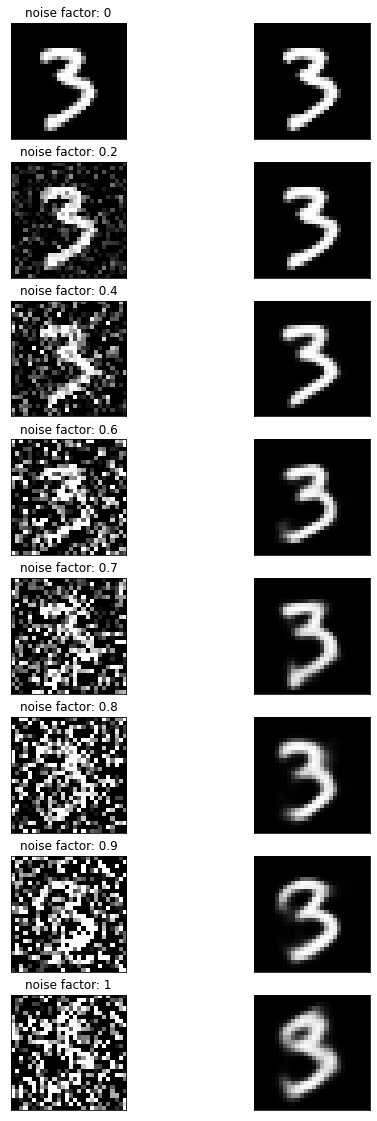

In [19]:
_, axs = plt.subplots(8, 2, figsize=(8,20))
plt.gray()
#for i in range(10):
i=30
axs[0,0].set_title("noise factor: 0")
axs[0,0].imshow(x_test_noisy_0[i].reshape(28,28))
axs[0,1].imshow(decode_images_0[i].reshape(28,28))

axs[1,0].set_title("noise factor: 0.2")
axs[1,0].imshow(x_test_noisy_20[i].reshape(28,28))
axs[1,1].imshow(decode_images_20[i].reshape(28,28))

axs[2,0].set_title("noise factor: 0.4")
axs[2,0].imshow(x_test_noisy_40[i].reshape(28,28))
axs[2,1].imshow(decode_images_40[i].reshape(28,28))

axs[3,0].set_title("noise factor: 0.6")
axs[3,0].imshow(x_test_noisy_60[i].reshape(28,28))
axs[3,1].imshow(decode_images_60[i].reshape(28,28))

axs[4,0].set_title("noise factor: 0.7")
axs[4,0].imshow(x_test_noisy_70[i].reshape(28,28))
axs[4,1].imshow(decode_images_70[i].reshape(28,28))

axs[5,0].set_title("noise factor: 0.8")
axs[5,0].imshow(x_test_noisy_80[i].reshape(28,28))
axs[5,1].imshow(decode_images_80[i].reshape(28,28))

axs[6,0].set_title("noise factor: 0.9")
axs[6,0].imshow(x_test_noisy_90[i].reshape(28,28))
axs[6,1].imshow(decode_images_90[i].reshape(28,28))

axs[7,0].set_title("noise factor: 1")
axs[7,0].imshow(x_test_noisy_100[i].reshape(28,28))
axs[7,1].imshow(decode_images_100[i].reshape(28,28))
    
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_xaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
    
axs[1,0].get_xaxis().set_visible(False)
axs[1,0].get_yaxis().set_visible(False)
axs[1,1].get_xaxis().set_visible(False)
axs[1,1].get_yaxis().set_visible(False)

axs[2,0].get_xaxis().set_visible(False)
axs[2,0].get_yaxis().set_visible(False)
axs[2,1].get_xaxis().set_visible(False)
axs[2,1].get_yaxis().set_visible(False)
    
axs[3,0].get_xaxis().set_visible(False)
axs[3,0].get_yaxis().set_visible(False)
axs[3,1].get_xaxis().set_visible(False)
axs[3,1].get_yaxis().set_visible(False)

axs[4,0].get_xaxis().set_visible(False)
axs[4,0].get_yaxis().set_visible(False)
axs[4,1].get_xaxis().set_visible(False)
axs[4,1].get_yaxis().set_visible(False)
    
axs[5,0].get_xaxis().set_visible(False)
axs[5,0].get_yaxis().set_visible(False)
axs[5,1].get_xaxis().set_visible(False)
axs[5,1].get_yaxis().set_visible(False)

axs[6,0].get_xaxis().set_visible(False)
axs[6,0].get_yaxis().set_visible(False)
axs[6,1].get_xaxis().set_visible(False)
axs[6,1].get_yaxis().set_visible(False)

axs[7,0].get_xaxis().set_visible(False)
axs[7,0].get_yaxis().set_visible(False)
axs[7,1].get_xaxis().set_visible(False)
axs[7,1].get_yaxis().set_visible(False)
plt.show()

In [20]:
autoencoder_0.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_20.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_40.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_60.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_70.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_80.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_90.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder_100.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
loss_list=[]
loss_list.append(autoencoder_0.evaluate(x_test_noisy_0, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_20.evaluate(x_test_noisy_20, x_test, batch_size=32, verbose=0))

loss_list.append(autoencoder_40.evaluate(x_test_noisy_40, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_60.evaluate(x_test_noisy_60, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_70.evaluate(x_test_noisy_70, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_80.evaluate(x_test_noisy_80, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_90.evaluate(x_test_noisy_90, x_test, batch_size=32, verbose=0))
loss_list.append(autoencoder_100.evaluate(x_test_noisy_100, x_test, batch_size=32, verbose=0))
print(loss_list)

[0.061899730837345124, 0.06946178287267685, 0.08340803546905518, 0.1039319195151329, 0.11693305801153182, 0.12948510711193084, 0.1419174273967743, 0.15360808300971984]


In [22]:
noise_list=[0,0.2,0.4,0.6,0.7,0.8,0.9,1]

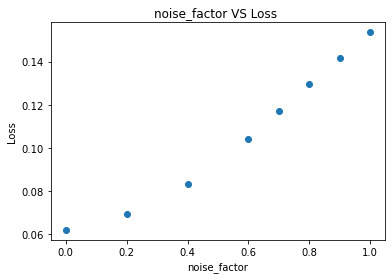

In [25]:
plt.xlabel("noise_factor")
plt.ylabel("Loss")
plt.title("noise_factor VS Loss ")
plt.scatter(noise_list, loss_list)

In [ ]:
_, axs = plt.subplots(4, 10, figsize=(20,20))
#plt.gray()
for i in range(10):
    axs[0,i].imshow(x_test_noisy[i].reshape(28,28))
    axs[1,i].imshow(encoded_images_noisy[i].reshape(7,7*32), aspect=32)
    axs[2,i].imshow(x_test[i].reshape(28,28))
    axs[3,i].imshow(encoded_images[i].reshape(7,7*32),aspect=32)
    
    axs[0,i].get_xaxis().set_visible(False)
    axs[0,i].get_yaxis().set_visible(False)
    
    axs[1,i].get_xaxis().set_visible(False)
    axs[1,i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
for i in range(len(autoencoder.layers)):
	layer = autoencoder.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

In [ ]:
model_1=tf.keras.Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[1].output)
model_3=tf.keras.Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[3].output)
model_5=tf.keras.Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[5].output)
model_7=tf.keras.Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[7].output)
model_9=tf.keras.Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[9].output)

In [ ]:
xx=x_test_noisy[5]
y_1=model_1.predict(x_test_noisy[5:6])
y_3=model_3.predict(x_test_noisy[5:6])
y_5=model_5.predict(x_test_noisy[5:6])
y_7=model_7.predict(x_test_noisy[5:6])
y_9=model_9.predict(x_test_noisy[5:6])
yy=autoencoder.predict(x_test_noisy[5:6])

In [ ]:
_, axs = plt.subplots(1, 7, figsize=(40,40))
#,cmap=plt.cm.viridis
plt.viridis()
#for i in range(7):
axs[0].imshow(xx.reshape(28,28))
axs[1].imshow(y_1.reshape(28,28*32), aspect=32)
axs[2].imshow(y_3.reshape(14,14*32), aspect=32)
axs[3].imshow(y_5.reshape(7,7*32), aspect=32)
axs[4].imshow(y_7.reshape(14,14*32), aspect=32)
axs[5].imshow(y_9.reshape(28,28))
axs[6].imshow(yy.reshape(28,28))
    
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)

axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)

axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)

axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)

axs[4].get_xaxis().set_visible(False)
axs[4].get_yaxis().set_visible(False)

axs[5].get_xaxis().set_visible(False)
axs[5].get_yaxis().set_visible(False)

axs[6].get_xaxis().set_visible(False)
axs[6].get_yaxis().set_visible(False)

#axs[1,i].get_xaxis().set_visible(False)
#axs[1,i].get_yaxis().set_visible(False)
plt.show()